In [123]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from prophet import Prophet


In [124]:
df=pd.read_csv("avocado.csv")
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [125]:
df.shape

(18249, 14)

In [126]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [127]:
df.isnull().sum()

,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Prepare before applying Facebook Prophet Tool**

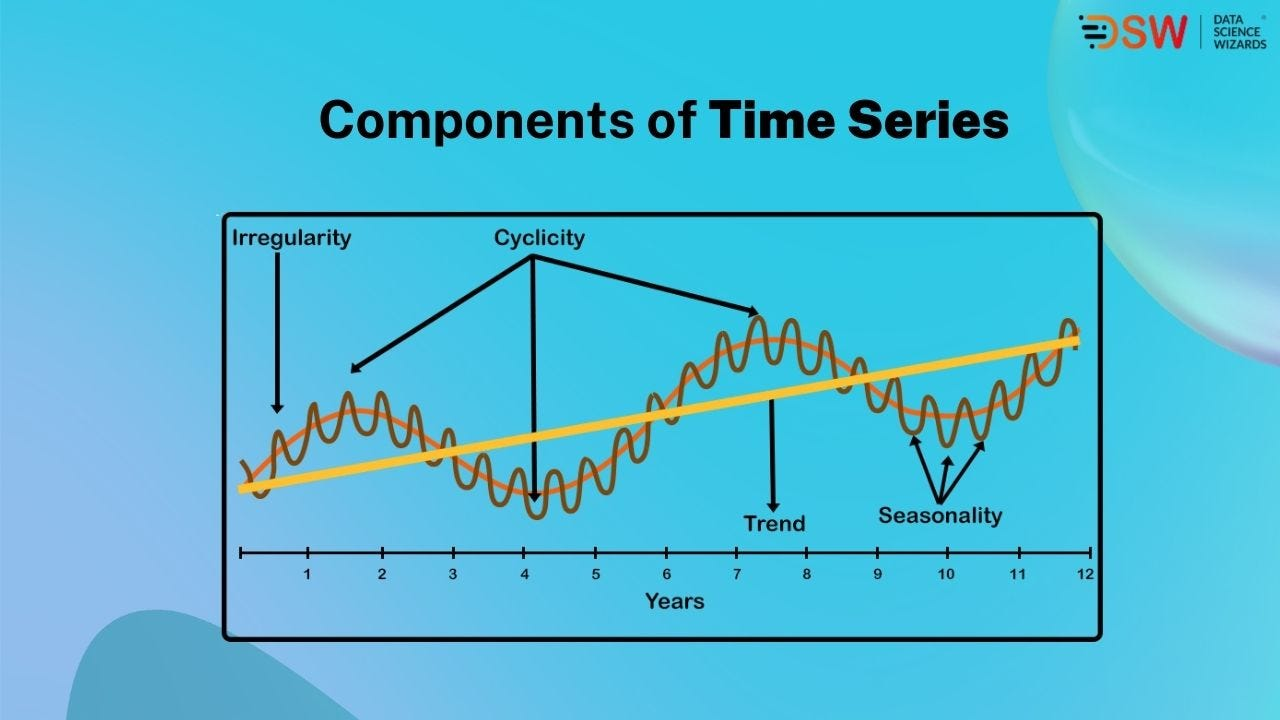



#**FBProphet ile Yapılabilecek Analizler ve Profit Üretme**

FBProphet, zaman serisi verilerini tahmin etmek için güçlü bir araçtır. Özellikle trend, mevsimsellik ve tatil etkileri gibi karmaşık desenleri yakalamada oldukça başarılıdır. Bu sayede, gelecekteki değerleri tahmin etmek ve bu tahminlere göre kararlar almak mümkün hale gelir.

#**FBProphet ile Yapılabilecek Analiz Türleri**
Satış Tahmini: Ürün veya hizmet satışlarının gelecekteki seviyesini tahmin etmek, stok yönetimi ve üretim planlaması için kritik öneme sahiptir.

Talep Tahmini: Müşteri talebinin gelecekteki seviyesini tahmin etmek, pazarlama stratejileri ve kaynak tahsisi için önemlidir.

Fiyat Tahmini: Ürün veya hizmet fiyatlarının gelecekteki seyrinin tahmin edilmesi, fiyatlandırma stratejileri ve rekabet analizi için faydalıdır.

Enerji Tüketimi Tahmini: Elektrik, doğalgaz gibi enerji kaynaklarının tüketiminin tahmin edilmesi, enerji üretimi ve dağıtımı planlaması için önemlidir.

Trafik Tahmini: Yoğunluk, hız gibi trafik verilerinin tahmin edilmesi, ulaşım planlaması ve trafik yönetimi için faydalıdır.

Finansal Veri Tahmini: Hisse senedi fiyatları, döviz kurları gibi finansal verilerin tahmin edilmesi, yatırım kararları için önemlidir.

#**FBProphet ile Profit Üretme**

FBProphet'in sağladığı tahminler, işletmelere birçok farklı şekilde fayda sağlayabilir ve dolayısıyla karlılığı artırabilir:

Envanter Yönetimi: Doğru talep tahmini sayesinde, stok seviyeleri optimize edilerek, stokta kalma maliyetleri azaltılabilir ve talep karşılanamama riskleri minimize edilebilir.

Üretim Planlaması: Üretim miktarları, talep tahminlerine göre ayarlanarak, üretim maliyetleri düşürülebilir ve müşteri memnuniyeti artırılabilir.

Pazarlama Stratejileri: Pazarlama kampanyaları, talep tahminlerine göre zamanlanarak, bütçeler daha verimli kullanılabilir ve satışlar artırılabilir.

Fiyatlandırma Stratejileri: Fiyatlandırma kararları, talep ve maliyet tahminlerine göre alındığında, kar marjları optimize edilebilir.

Risk Yönetimi: Talep dalgalanmaları ve diğer belirsizlikler, tahminler sayesinde daha iyi anlaşılabilir ve riskler minimize edilebilir.

Yeni Ürün Geliştirme: Yeni ürünlerin potansiyel pazar büyüklüğü, talep tahminleri sayesinde değerlendirilebilir.

#Örnek Senaryo:

Bir e-ticaret şirketi, FBProphet ile ürünlerinin aylık satışlarını tahmin ediyor. Tahminlere göre, belirli bir ürünün satışlarının yaz aylarında önemli ölçüde artacağı görülüyor. Şirket, bu bilgiye dayanarak, ürünün stok seviyesini artırıyor ve yaz aylarında özel bir pazarlama kampanyası başlatıyor. Sonuç olarak, satışlar tahmin edilenin de üzerinde gerçekleşiyor ve şirket karlılığını artırıyor.

In [157]:
#Python'ın tarih ve saat işlemlerinde kullanabileceği bir formata dönüştürülmesi için kullanılır. Bu, daha sonraki analizlerde tarihsel verilerin daha kolay kullanılmasını sağlar.
df['Date']=pd.to_datetime(df['Date'])
df.tail(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [130]:
df1 = df[['Date','AveragePrice']]
df1.head(2)

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35


In [131]:
#Prophet adlı bir zaman serisi tahmin modeli, tarih sütununu 'ds' ve tahmin edilecek değerin sütununu 'y' olarak tanımlar.
df1.rename(columns={'Date': 'ds','AveragePrice':'y'},inplace=True)
df1

<ipython-input-131-87c8e97afeef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [132]:
df1= df1.sort_values(by='ds')
df1.head(5)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


<Axes: xlabel='ds', ylabel='y'>

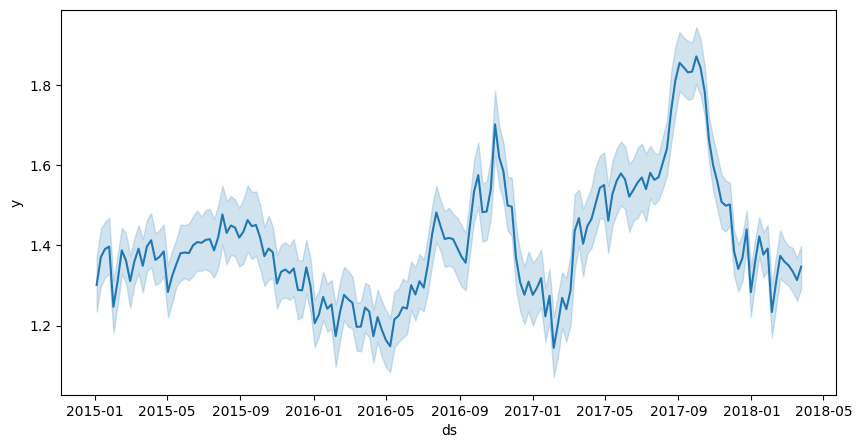

In [133]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x='ds',y='y',data=df1)

In [134]:
m=Prophet()
m.fit(df1)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tpm314k/yuxcm3c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tpm314k/4rckzlvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99248', 'data', 'file=/tmp/tmp8tpm314k/yuxcm3c2.json', 'init=/tmp/tmp8tpm314k/4rckzlvr.json', 'output', 'file=/tmp/tmp8tpm314k/prophet_model4idr_ys3/prophet_model-20240917120236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:02:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:02:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [135]:
#Forecast into the future
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.164124,0.551341,1.574239,0.972092,1.362232,-0.086273,-0.086273,-0.086273,-0.086273,-0.086273,-0.086273,0.0,0.0,0.0,1.077850
530,2019-03-22,1.163396,0.552272,1.584033,0.970536,1.362700,-0.084573,-0.084573,-0.084573,-0.084573,-0.084573,-0.084573,0.0,0.0,0.0,1.078823
531,2019-03-23,1.162669,0.565139,1.674736,0.969116,1.363216,-0.082598,-0.082598,-0.082598,-0.082598,-0.082598,-0.082598,0.0,0.0,0.0,1.080071
532,2019-03-24,1.161941,0.547954,1.592521,0.967696,1.363812,-0.080368,-0.080368,-0.080368,-0.080368,-0.080368,-0.080368,0.0,0.0,0.0,1.081573
533,2019-03-25,1.161214,0.534823,1.581502,0.966275,1.364291,-0.077910,-0.077910,-0.077910,-0.077910,-0.077910,-0.077910,0.0,0.0,0.0,1.083303


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



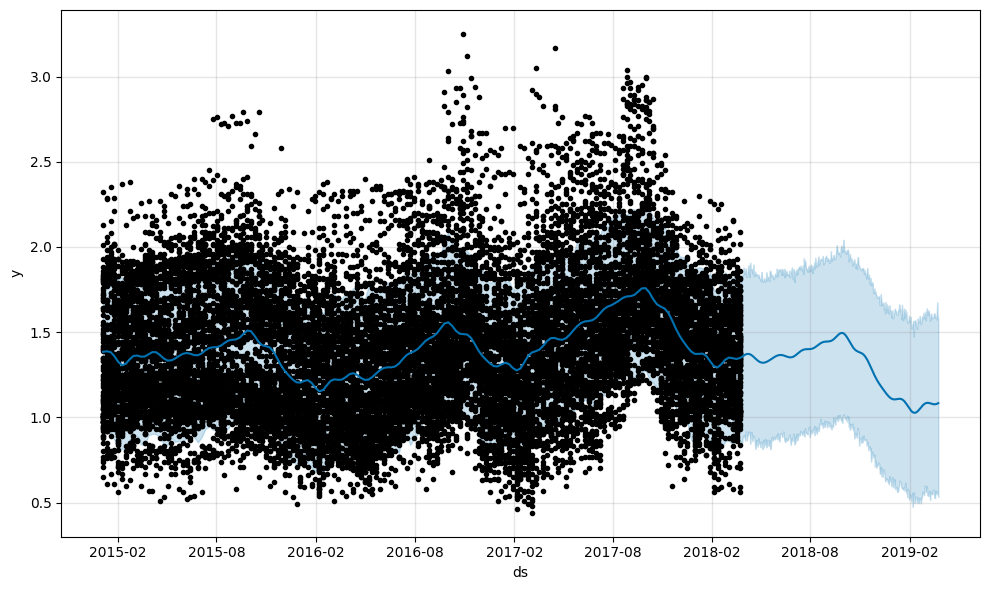

In [136]:
fig1=m.plot(forecast)

In [137]:
from prophet.plot import plot_plotly


plot_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



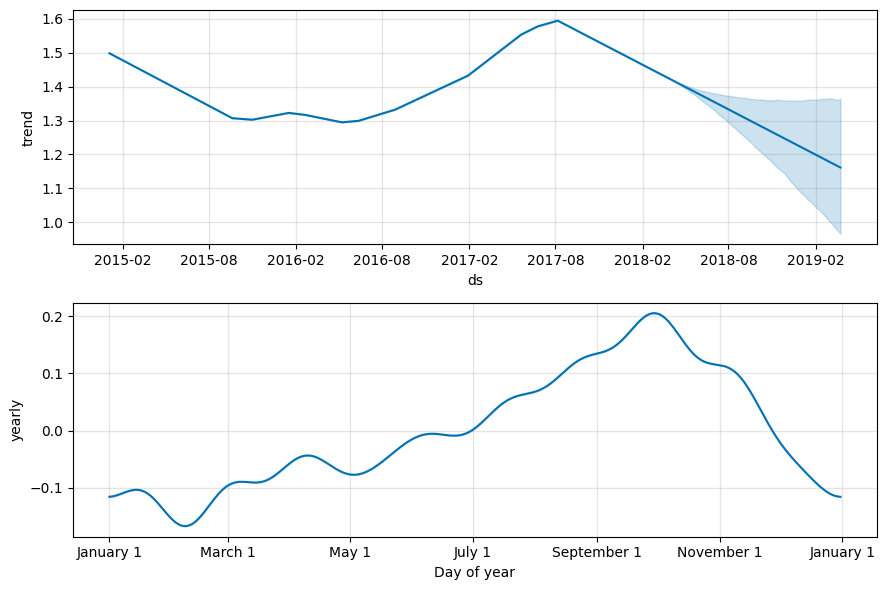

In [138]:
figure=m.plot_components(forecast)

In [139]:
df2=df1.copy()
df2.head(5)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [159]:
#Fiyatın tarih verisine göre ortalamasını alıp tabloda o şekilde görmek istedik.
df3=df2.groupby('ds')['y'].mean().reset_index()

In [152]:
df3

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


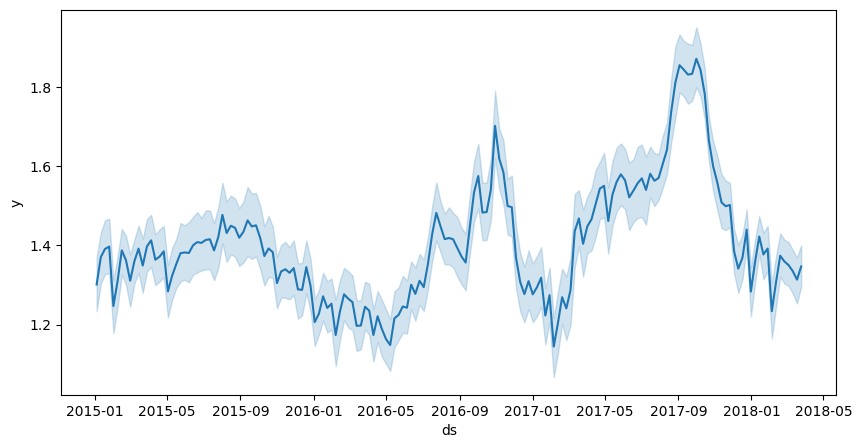

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x='ds',y='y',data=df2) # call the lineplot function from seaborn
plt.show()

In [153]:
m=Prophet()
m.fit(df3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tpm314k/6vuzdjbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tpm314k/gs0qv6ac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80381', 'data', 'file=/tmp/tmp8tpm314k/6vuzdjbd.json', 'init=/tmp/tmp8tpm314k/gs0qv6ac.json', 'output', 'file=/tmp/tmp8tpm314k/prophet_model5utoc9r8/prophet_model-20240917121133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [154]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.344228,1.119266,1.371021,1.250794,1.425174,-0.090793,-0.090793,-0.090793,-0.090793,-0.090793,-0.090793,0.0,0.0,0.0,1.253435
530,2019-03-22,1.343875,1.124864,1.373186,1.249840,1.425267,-0.088579,-0.088579,-0.088579,-0.088579,-0.088579,-0.088579,0.0,0.0,0.0,1.255295
531,2019-03-23,1.343521,1.125073,1.373322,1.248887,1.425294,-0.086035,-0.086035,-0.086035,-0.086035,-0.086035,-0.086035,0.0,0.0,0.0,1.257486
532,2019-03-24,1.343168,1.130881,1.386027,1.247956,1.425252,-0.083185,-0.083185,-0.083185,-0.083185,-0.083185,-0.083185,0.0,0.0,0.0,1.259982
533,2019-03-25,1.342814,1.142476,1.375201,1.247185,1.425211,-0.080064,-0.080064,-0.080064,-0.080064,-0.080064,-0.080064,0.0,0.0,0.0,1.262750


In [156]:
##ortalama fiyat grafiği
plot_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

